# Part 5 - Multiple Linear Regression

In the previous notebook we trained a Simple Linear Regressor with a single feature (`sqft`).  
In this notebook we aim to extend the capability of our model by using multiple features for our independent variable `X`.  
Our equation is the same however our `X` is now a matrix and the equation no longer represents a line but rather a hyperplane in N-dimensional space where **N** is the number of features in `X`.
  
$$
y = mX + b
$$ 
  


In [1]:
import time
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

## Let's load the data and remind ourselves of the contents

In [2]:
df = pd.read_csv('./data/sf/data_clean_engineered.csv')
df.head()

,bath,bed,sqft,price,property_type_apartment,property_type_auction,property_type_coming,property_type_condo,property_type_coop,property_type_house,...,postal_code_94121,postal_code_94122,postal_code_94123,postal_code_94124,postal_code_94127,postal_code_94131,postal_code_94132,postal_code_94133,postal_code_94134,postal_code_94158
0,1.0,1.0,830.0,849000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,1500.0,1650000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,1189.0,1195000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,3.0,1520.0,1995000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,566.0,625000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Prepare our training and validation data

In [3]:
df.columns

Index(['bath', 'bed', 'sqft', 'price', 'property_type_apartment',
       'property_type_auction', 'property_type_coming', 'property_type_condo',
       'property_type_coop', 'property_type_house', 'property_type_lot',
       'property_type_new', 'postal_code_94102', 'postal_code_94103',
       'postal_code_94104', 'postal_code_94105', 'postal_code_94107',
       'postal_code_94108', 'postal_code_94109', 'postal_code_94110',
       'postal_code_94111', 'postal_code_94112', 'postal_code_94114',
       'postal_code_94115', 'postal_code_94116', 'postal_code_94117',
       'postal_code_94118', 'postal_code_94121', 'postal_code_94122',
       'postal_code_94123', 'postal_code_94124', 'postal_code_94127',
       'postal_code_94131', 'postal_code_94132', 'postal_code_94133',
       'postal_code_94134', 'postal_code_94158'],
      dtype='object')

Recall we need to reshape the input data

In [4]:
features = [feature for feature in df.columns if feature != 'price']
X = df[features]
y = df['price']
X_np = X.values
y_np = y.values.reshape((len(df), 1))

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_np, y_np, test_size=0.30, random_state=2018) # split 70% train, 30% validation

In [8]:
regressor = LinearRegression(normalize=True)

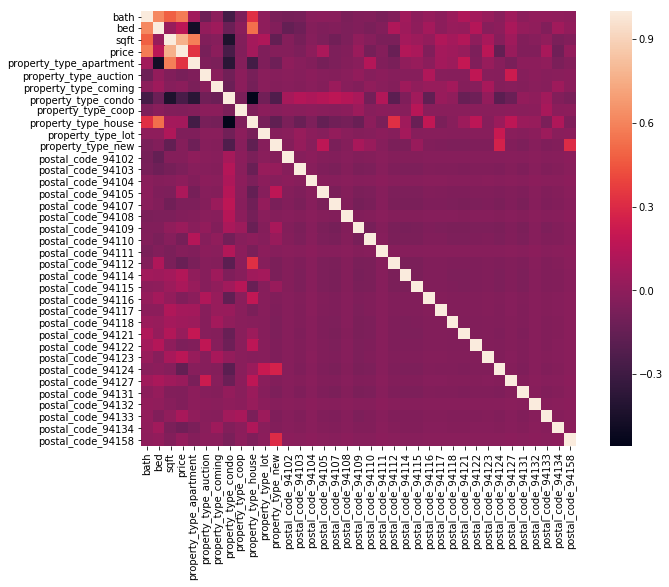

In [11]:
corrmat = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, vmax=1, square=True);

In [12]:
model = regressor.fit(X_train, y_train)

In [13]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X) # predict y values from input X
    mse = mean_squared_error(y_true=y, y_pred=y_pred)
    print("Mean Squared Error: {}".format(mse))
    print("Accuracy: {}%".format(model.score(X, y)*100.0))
evaluate_model(model, X_val, y_val)

Mean Squared Error: 239175723133.93228
Accuracy: 82.80837049004276%


In [19]:
# try brand new data
actual_price = '$1,690,900'
sqft = 1618
bed = 3
bath = 3
property_type = 'house'
postal_code = '94110'
new_data = {'sqft': sqft,
            'bed': bed,
            'bath': bath,
            'property_type_{}'.format(property_type): 1,
            'postal_code_{}'.format(postal_code): 1
           }
new_df = pd.get_dummies(pd.DataFrame(data=[new_data], columns=X.columns).fillna(0))
new_df
print(X.shape)
predicted_price = model.predict(new_df).squeeze()
print("predicted price: ${}M".format(predicted_price/1e6))
print("actual price: {}".format(actual_price))


(638, 36)
predicted price: $1.73696M
actual price: $1,690,900


Compare with our simple linear model from before

In [20]:
with open('./models/sf/simple_linear.pkl', 'rb') as f:
    simple_linear = pickle.load(f)
# print(prediction)
sqft_input = np.array([sqft]).reshape(1,1)
predicted_price_sl = simple_linear.predict(sqft_input).squeeze()
print("simple linear predicted price: ${}M".format(predicted_price_sl/1e6))

simple linear predicted price: $1.529787551454986M


## Retrain on entire dataset and save model to disk

In [21]:
model = regressor.fit(X, y)
with open('./models/sf/multiple_linear.pkl', 'wb') as f:
    pickle.dump(model, f)